<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-и-предобработка-данных" data-toc-modified-id="Изучение-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных,-проверка-типов-переменных,-пропусков-и-дубликатов" data-toc-modified-id="Загрузка-данных,-проверка-типов-переменных,-пропусков-и-дубликатов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных, проверка типов переменных, пропусков и дубликатов</a></span></li><li><span><a href="#Проверка-аномалий-в-данных" data-toc-modified-id="Проверка-аномалий-в-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка аномалий в данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Соотношение-видов-объектов-общественного-питания-по-количеству" data-toc-modified-id="Соотношение-видов-объектов-общественного-питания-по-количеству-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Соотношение видов объектов общественного питания по количеству</a></span></li><li><span><a href="#Соотношение-сетевых-и-несетевых-заведений-по-количеству" data-toc-modified-id="Соотношение-сетевых-и-несетевых-заведений-по-количеству-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Соотношение сетевых и несетевых заведений по количеству</a></span></li><li><span><a href="#Сетевое-распространение-по-видам-объектов-общественного-питания" data-toc-modified-id="Сетевое-распространение-по-видам-объектов-общественного-питания-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Сетевое распространение по видам объектов общественного питания</a></span></li><li><span><a href="#Cвязь-между-размером-сети-и-количеством-посадочных-мест" data-toc-modified-id="Cвязь-между-размером-сети-и-количеством-посадочных-мест-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Cвязь между размером сети и количеством посадочных мест</a></span></li><li><span><a href="#Среднее-количество-посадочных-мест-по-видам-объектов-общественного-питания" data-toc-modified-id="Среднее-количество-посадочных-мест-по-видам-объектов-общественного-питания-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Среднее количество посадочных мест по видам объектов общественного питания</a></span></li><li><span><a href="#Получение-переменной-улиц" data-toc-modified-id="Получение-переменной-улиц-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Получение переменной улиц</a></span></li><li><span><a href="#Топ-10-улиц-по-количеству-объектов-общественного-питания." data-toc-modified-id="Топ-10-улиц-по-количеству-объектов-общественного-питания.-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Топ-10 улиц по количеству объектов общественного питания.</a></span></li><li><span><a href="#Определение-районов-с-максимальным-числом-заведений" data-toc-modified-id="Определение-районов-с-максимальным-числом-заведений-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Определение районов с максимальным числом заведений</a></span></li><li><span><a href="#Улицы-с-одним-объектом-общественного-питания" data-toc-modified-id="Улицы-с-одним-объектом-общественного-питания-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Улицы с одним объектом общественного питания</a></span></li><li><span><a href="#Распределение-количества-посадочных-мест-для-улиц-с-большим-количеством-заведений" data-toc-modified-id="Распределение-количества-посадочных-мест-для-улиц-с-большим-количеством-заведений-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Распределение количества посадочных мест для улиц с большим количеством заведений</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li></ul></div>

# Анализ рынка заведений общественного питания Москвы

В рамках подготовки проекта открытия кафе с роботизированным обслуживанием в Москве проведем исследование рынка заведений общественного питания города. Это позволит в дальнейшем принять обоснованное решение о таких значимых параметрах проекта, как вид заведения, количество посадочных мест, район расположения, а также целесообразность развития сетевого формата.

Данное исследование основано на следующих источниках данных:
* открытые данные о заведениях общественного питания в Москве (с названиями, форматами и типами заведений, адресами и количеством посадочных мест;
* справочник адресов и соответствующих им районов города, полученный из API сервиса Яндекс.Геолокатор.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
from IPython.display import display
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import json
from io import BytesIO
import requests
import plotly.express as px

## Изучение и предобработка данных

### Загрузка данных, проверка типов переменных, пропусков и дубликатов

Откроем файл с данными о заведениях общественного питания Москвы и изучим общую информацию:

In [2]:
def file_read (server_path, filename):
    if os.path.exists(server_path):
        file_read = pd.read_csv(server_path)
    else:
        file_read = pd.read_csv(filename)
    return file_read

data = file_read('/datasets/rest_data.csv','rest_data.csv')
data.info()
display(data.head())
print('Дубликатов в таблице: {}'.format(data.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Дубликатов в таблице: 0


**Вывод.** В исходном датасете содержится 15366 наблюдений, пропусков и дубликатов не обнаружено, типы переменных распознаны верно, названия столбцов закодированы корректно.

### Проверка аномалий в данных

Изучим категориальные переменные:

In [3]:
print('Сетевые рестораны:', data['chain'].unique())
print('Типы объектов общественного питания:', data['object_type'].unique())

Сетевые рестораны: ['нет' 'да']
Типы объектов общественного питания: ['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']


Категориальные переменные закодированы корректно.

Для удобства дальнейшей обработки приведем названия заведений к нижнему регистру, заменим слова "ресторан"/"кафе" и аналогичные на пустую строку, а также уберем лишние кавычки и пробелы по краям).

In [4]:
data['object_name'] = data['object_name'].str.lower()

garbage = ['ресторан', 'кафе', 'предприятие быстрого обслуживания', 'пбо', '«', '»']
for i in garbage:
    data['object_name'] = data['object_name'].str.replace(i, '')
    
data['object_name'] = data['object_name'].str.strip()

Проверим наличие неявных дубликатов в данных:

In [5]:
print('Дубликатов по всем переменным, кроме id:', data.duplicated(
    ['object_name','address', 'object_type','chain', 'number']).sum())

Дубликатов по всем переменным, кроме id: 85


В данных обнаружено 82 записи с дублирующими значениями всех переменных, кроме id заведения. Удалим эти записи.

In [6]:
data = data.drop_duplicates(['object_name','address', 'object_type','chain', 'number'])

In [7]:
print('Дубликатов пар названий и адресов:', data.duplicated(['object_name','address']).sum())

Дубликатов пар названий и адресов: 155


Также в данных есть кафе с совпадающими адресами и названиями, изучим несколько примеров подробнее:

In [8]:
pivot = data[data.duplicated(subset=['object_name','address'], keep=False)].pivot_table(
    index=['object_name','address'], 
    values='number', 
    aggfunc=([min, max])
   ).reset_index()

pivot.head(10)

,object_name,address,min,max
,,,number,number
0,,"город Москва, 1-я Останкинская улица, дом 55",4,30
1,,"город Москва, 19-й километр Московской Кольцев...",20,42
2,,"город Москва, Береговой проезд, дом 5А, корпус 1",2,25
3,,"город Москва, Большая Семёновская улица, дом 16",5,5
4,,"город Москва, Варшавское шоссе, дом 95, корпус 1",38,46
5,,"город Москва, Воронежская улица, дом 13",24,100
6,,"город Москва, Люблинская улица, дом 112, строе...",0,10
7,,"город Москва, Малахитовая улица, владение 27, ...",0,10
8,,"город Москва, Смольная улица, дом 24Б",4,40


Обнаруженные кафе с совпадающими названиями и адресами отличаются по количеству посадочных мест. Необходимо проверить источник данных и выяснить причину. Однако в рамках данного исследования ошибка определения записей с корректным количеством мест в 125 случаях несущественно повлияет на результат. Поэтому избавимся от дубликатов, оставив записи с максимальным числом мест (как наиболее правдоподобным в фрагменте таблицы выше).

In [9]:
data = data.sort_values(
    by='number', ascending=False).drop_duplicates(['object_name','address'])

Изучим основные характеристики распределения единственной количественной переменной (числа посадочных мест):

In [10]:
display(data['number'].describe())

count    15126.000000
mean        60.092027
std         75.077042
min          0.000000
25%         14.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

Половина заведений вмещают от 14 до 80 гостей, распределение смещено вправо (средние значения больше медианы в 1,5 раза). Есть выбивающиеся максимальные значения, также есть заведения с 0 посадочных мест, изучим их подробнее.

In [11]:
print('Заведений с 0 посадочных мест:', len(data.query('number == 0')))
display(data.query('number == 0').head())

print('Заведений с 1000 и более посадочных мест:', len(data.query('number > 1000')))
display(data.query('number > 1000').head())

Заведений с 0 посадочных мест: 1562


,id,object_name,chain,object_type,address,number
7513,147435,выпечка,нет,предприятие быстрого обслуживания,"город Москва, Шипиловский проезд, владение 39,...",0
9822,170278,"выпечка, шаурма",нет,предприятие быстрого обслуживания,"город Москва, Первомайская улица, дом 9",0
14660,214824,mon bon,нет,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 13А",0
14659,220301,"грячие закуски,напитки, поп корн, мороженое,сл...",нет,кафетерий,"город Москва, Каширское шоссе, дом 14",0
9832,170317,донер & тандыр,нет,предприятие быстрого обслуживания,"город Москва, Коломенский проезд, дом 8, корпус 5",0


Заведений с 1000 и более посадочных мест: 7


,id,object_name,chain,object_type,address,number
12723,199696,arena by soho family,нет,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700
8148,80291,банкетный зал шелк,нет,ресторан,"город Москва, Большой Саввинский переулок, дом...",1500
8345,27750,столовая-буфет,нет,столовая,"город Москва, улица Волхонка, дом 15",1400
9064,19719,комбинат питания управление академсервис,нет,столовая,"город Москва, проспект Вернадского, дом 84, ст...",1288
4480,27024,рум сервис,нет,ресторан,"город Москва, Кутузовский проспект, дом 2/1, с...",1200


Можно предположить, что 1569 заведений с 0 посадочных мест - это закусочные, заведения формата black kitchen или точки на рынках и фудкортах (например, Лепим и Варим на Мытной улице, дом 74). Что касается выбивающихся максимальных значений, это могут быть корпоративные и учебные столовые, а также рестораны с большой вместительностью.

**Вывод.**

Исходные данные содержат информацию о заведениях общественного питания Москвы, включая такие параметры, как название заведения, принадлеженость к сети, вид, адрес и число посадочных мест. На этапе предварительной обработки были обнаружены неявные дубликаты, после удаления которых в таблице осталось 15159 записей (из 15366 исходных). В дальнейшем следует подробнее изучить источник данных и понять причину возникновения дубликатов, в частности, почему записям с одинаковыми параметрами присвоены разные id и заведения с совпадающими наваниями и адресами записаны с разным числом посадочных мест.

## Анализ данных ##

### Соотношение видов объектов общественного питания по количеству

,index,object_type,percent
0,кафе,5989,39.6%
1,столовая,2574,17.0%
2,ресторан,2263,15.0%
3,предприятие быстрого обслуживания,1881,12.4%
4,бар,847,5.6%
5,буфет,566,3.7%
6,кафетерий,390,2.6%
7,закусочная,345,2.3%
8,магазин (отдел кулинарии),271,1.8%


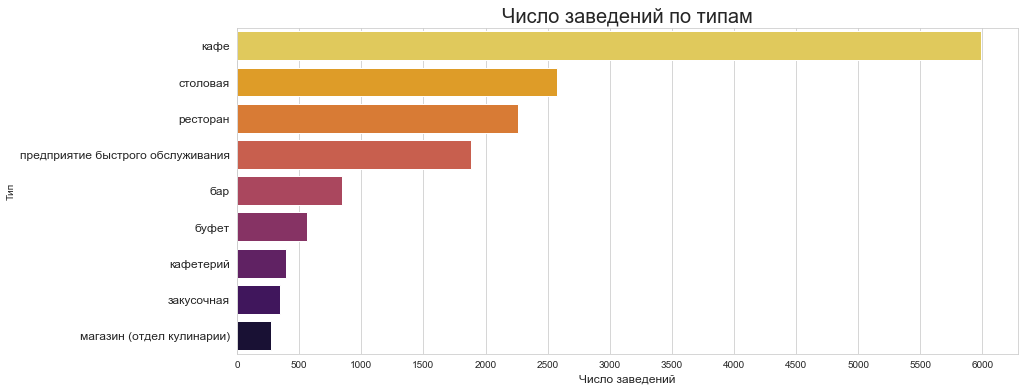

In [12]:
object_types = data['object_type'].value_counts().reset_index()
object_types['percent'] = (object_types['object_type'] / (object_types['object_type'].sum()) * 100).round(1).astype(str) + '%'
display(object_types)

plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.countplot(y="object_type", data=data, palette="inferno_r", order=data["object_type"].value_counts().index)
plt.title("Число заведений по типам", fontsize=20)
plt.ylabel("Тип", fontsize=10)
plt.xlabel("Число заведений", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=10)
plt.xticks(np.arange(0, 6500, 500)) 
plt.show()

На рынке общаественнго питания Москвы преобладают кафе, их доля составляет 40%, менее распространены столовые и рестораны (17% и 15% соответственно). Наименее популярны кафетерии, закусочные и отделы кулинарии.

### Соотношение сетевых и несетевых заведений по количеству

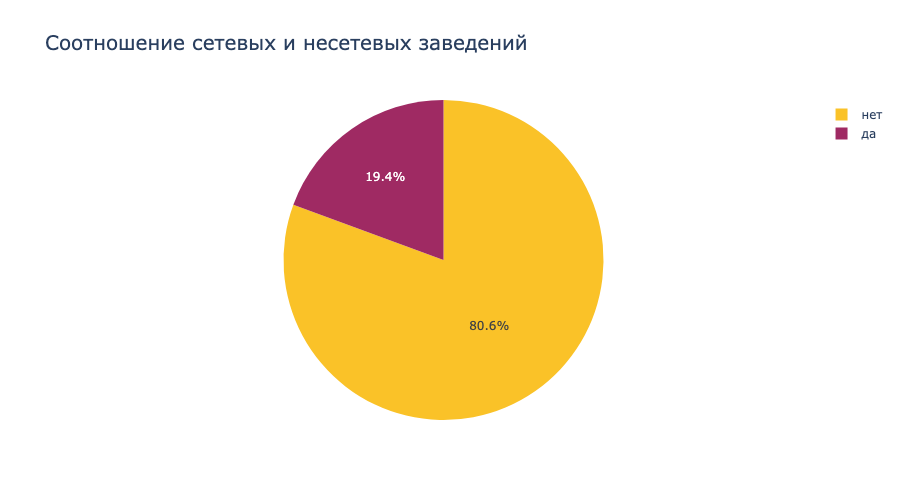

In [13]:
chains = data['chain'].value_counts().reset_index()
fig = go.Figure(data=[go.Pie(labels=chains['index'], 
                             values=chains['chain'])])
fig.update_layout(title_text='Соотношение сетевых и несетевых заведений', title_font_size=20)
fig.update_traces(marker=dict(colors=['#fac228','#9f2a63']))
fig.show(width=900, height=500, renderer='png')

В Москве преобладают несетевые рестораны и кафе, их доля превышает 80%.

### Сетевое распространение по видам объектов общественного питания


chain,object_type,да,нет,All,chain_share
0,бар,37,810,847,4.4%
1,буфет,11,555,566,1.9%
2,закусочная,56,289,345,16.2%
3,кафе,1378,4611,5989,23.0%
4,кафетерий,51,339,390,13.1%
5,магазин (отдел кулинарии),78,193,271,28.8%
6,предприятие быстрого обслуживания,782,1099,1881,41.6%
7,ресторан,536,1727,2263,23.7%
8,столовая,3,2571,2574,0.1%
9,All,2932,12194,15126,19.4%


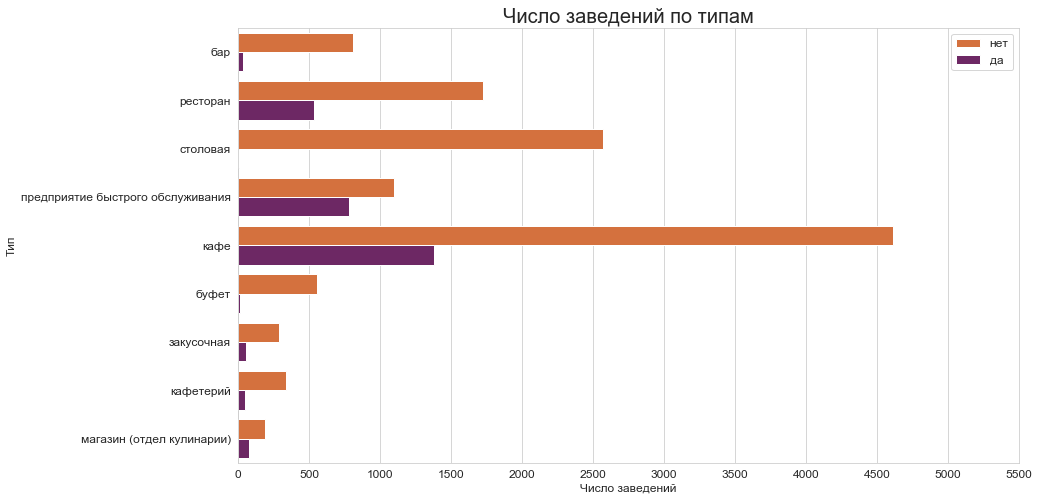

In [14]:
object_chain = data.pivot_table(index = 'object_type', columns = 'chain',values = 'id',
                                        aggfunc = 'count', margins=True).reset_index()
object_chain['chain_share'] = (object_chain['да']/object_chain['All']*100).round(1).astype(str) + '%'
display(object_chain)

plt.figure(figsize=(14,8))
sns.set_style('whitegrid')
sns.countplot(y="object_type", data=data, hue="chain", palette='inferno_r')
plt.title("Число заведений по типам", fontsize=20)
plt.ylabel("Тип", fontsize=12)
plt.xlabel("Число заведений", fontsize=12)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.xticks(np.arange(0, 6000, 500)) 
plt.show()

Среди всех типов заведений предприятиям быстрого обслуживания наиболее свойственен сетевой формат - 41.5% заведений входят в сети. На втором месте отделы кулинарии (28.8%), на третьем - рестораны (23.7%). Меньше всего сетевых форматов среди столовых и буфетов.

### Cвязь между размером сети и количеством посадочных мест

Изучим взаимосвязь между размером сети и средним количеством посадочных мест в заведении.

In [15]:
chains = data.loc[data['chain'] == 'да'].pivot_table(
    index=['object_name'], 
    values='number', 
    aggfunc=(['count', 'mean'])
   ).round()
chains.columns = ['count', 'mean_number']

display(chains.head(10))

,count,mean_number
object_name,,
-закусочная бургер кинг,1,84.0
-пекарея волконский,1,3.0
beverly hills diner,1,88.0
bierloga,1,75.0
black & white,1,40.0
bocconcino,3,67.0
boobo,1,46.0
bubbleology,1,6.0
burger club,3,20.0


В данных есть сети с 1 заведением. Удалим эти строки и проанализируем результат:

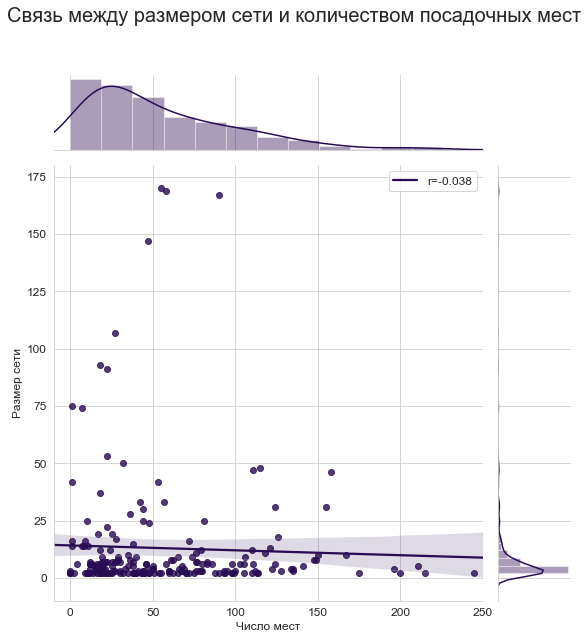

,mean_number,count
count,207.00,207.00
mean,56.58,12.97
std,47.24,26.50
min,0.00,2.00
25%,20.00,2.00
50%,44.00,5.00
75%,80.00,9.00
max,245.00,170.00


In [16]:
chains = chains[chains['count'] != 1]

r, p = st.pearsonr(chains['mean_number'], chains['count'])

sns.set_style('whitegrid')
sns.jointplot(x='mean_number', y='count', data=chains, kind='reg', 
              height=8, ratio=5, space=0.2, ylim=(-10, 180), xlim=(-10, 250), color='#280b53')

plt.suptitle("Cвязь между размером сети и количеством посадочных мест", fontsize=20, y = 1.1)
plt.ylabel("Размер сети", fontsize=12)
plt.xlabel("Число мест", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.legend(['r={0:.3f}'.format(r)], fontsize=12)
plt.show()

display(chains[['mean_number', 'count']].describe().round(2))

Для сетевых форматов Москвы характерно небольшое количество заведений: половина сетей включают от 2 до 9 заведений, при этом отдельные сети могут насчитывать 100 и более заведений (170 максимум), что объясняет смещение распределения вправо. В половине сетей среднее число посадочных мест на одно кафе варьируется от 20 до 80. Индекс корреляции двух переменных, равный 0.038, свидетельствует о том, что размер сети и среднее количество посадочных мест в заведениях не взаимосвязаны.

### Среднее количество посадочных мест по видам объектов общественного питания

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
бар,847.0,44.0,67.0,0.0,20.0,35.0,50.0,1700.0
буфет,566.0,52.0,57.0,0.0,15.0,32.0,80.0,320.0
закусочная,345.0,8.0,16.0,0.0,0.0,0.0,10.0,216.0
кафе,5989.0,40.0,38.0,0.0,15.0,32.0,50.0,533.0
кафетерий,390.0,9.0,15.0,0.0,0.0,6.0,12.0,200.0
магазин (отдел кулинарии),271.0,6.0,10.0,0.0,0.0,0.0,8.0,50.0
предприятие быстрого обслуживания,1881.0,21.0,39.0,0.0,0.0,6.0,25.0,580.0
ресторан,2263.0,97.0,95.0,0.0,48.0,80.0,115.0,1500.0
столовая,2574.0,130.0,95.0,0.0,52.0,103.0,200.0,1400.0


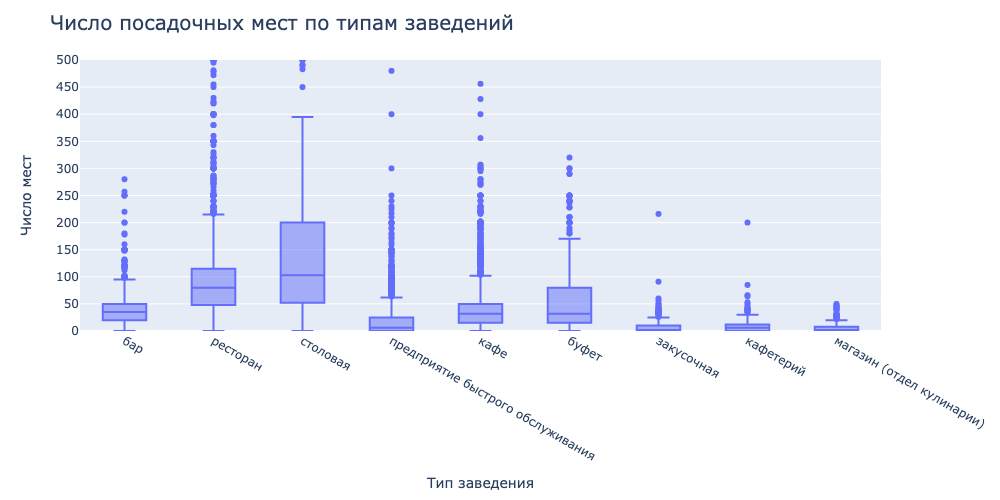

In [17]:
display(data.groupby('object_type')['number'].describe().round(0))

fig = px.box(data, x="object_type", y="number")

fig.update_layout(title_text='Число посадочных мест по типам заведений', 
                  yaxis_title='Число мест', xaxis_title='Тип заведения', 
                  title_font_size=20, width=1000, height=600)
fig.update_yaxes(range = [0,500], nticks=20)

fig.show(width=1000, height=500, renderer='png')

Как правило, самыми вместительными заведениями общественного питания являются столовые - от 52 до 200 мест в половине случаев; на втором месте рестораны - с межквартильным размахом от 48 до 115 мест. Бары и кафе очень близки  в распределении переменной, однако средние и медианные значения у баров выше (44 и 35 против 40 и 32 соответственно). Закусочные, кафетерии и отделы кулинарии характеризуются наименьшим количеством посадочных мест - как правило, в пределах 30 мест.

### Получение переменной улиц

Выделим в отдельный столбец информацию об улицах нахождения заведений из столбца address.

In [18]:
data['split'] = data['address'].str.split(r'\s*,\s*|\s*\,\s*')

def get_street(address):
    street = next(filter(lambda x: 
                    'улиц' in x or 
                    'просп' in x or 
                    'проезд' in x or
                    'переул' in x or 
                    'просек' in x or 
                    'тупик' in x or 
                    'буль' in x or
                    'алле' in x or
                    'линия' in x or
                    'килом' in x or
                    'кварт' in x or
                    'шосс' in x or
                    'площ' in x or
                    'набер' in x, address), None)
    return street

data['street'] = data['split'].apply(get_street)

In [19]:
print('Не удалось отпределить улицу:', len(data[data['street'].isnull()]))
print('Доля от общего числа наблюдений: {:.1%}'.format((len(data[data['street'].isnull()])/len(data))))

Не удалось отпределить улицу: 340
Доля от общего числа наблюдений: 2.2%


Для 340 строк не удалось установить улицу, поскольку она не указана в явном виде в самих адресах. Поскольку доля таких наблюдений составляет всего 2%, оставим пропуски в текущем виде.

### Топ-10 улиц по количеству объектов общественного питания. 

,street,count
0,проспект Мира,195
1,Профсоюзная улица,180
2,Ленинградский проспект,170
3,Пресненская набережная,164
4,Варшавское шоссе,163
5,Ленинский проспект,148
6,проспект Вернадского,126
7,Кутузовский проспект,112
8,Каширское шоссе,110
9,Кировоградская улица,106


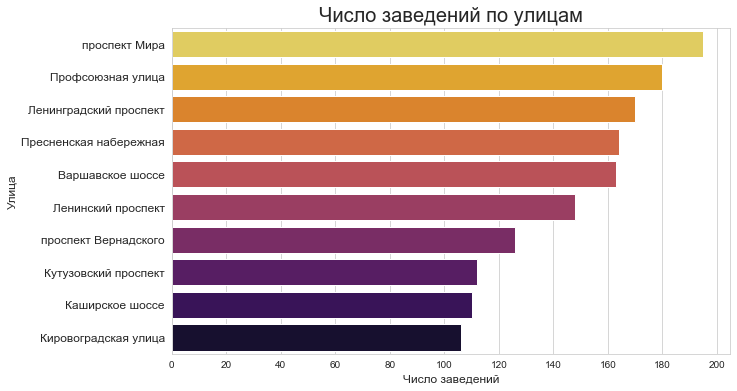

In [20]:
streets = data.pivot_table(index = 'street', values = 'id',
                                        aggfunc = 'count').sort_values(by='id', ascending=False)
streets.columns = ['count']
top_streets = streets[:10].reset_index()
display(top_streets)

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.barplot(y = top_streets['street'], x=top_streets['count'], palette='inferno_r')
plt.title("Число заведений по улицам", fontsize=20)
plt.ylabel("Улица", fontsize=12)
plt.xlabel("Число заведений", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=10)
plt.xticks(np.arange(0, 220, 20)) 
plt.show()

Наиболее насыщенными с точки зрения количества заведений общественного питания являются следующие улицы Москвы:
* проспект Мира
* Профсоюзная улица
* Ленинградский проспект
* Пресненская набережная
* Варшавское шоссе
* Ленинский проспект
* проспект Вернадского
* Кутузовский проспект
* Каширское шоссе
* Кировоградская улица

Среди всех улиц Москвы лидирует проспект Мира - с 197 заведениями.

### Определение районов с максимальным числом заведений

Создадим справочник адресов кафе, находящихся на ТОП-10 улиц:

In [21]:
top_address = data.loc[data['street'].isin(
    top_streets['street'])].groupby(['address', 'street']).agg({'id': 'count'}).reset_index()

dict_top = top_address['address']
print('Уникальных адресов на ТОП-10 улицах:', len(dict_top))

Уникальных адресов на ТОП-10 улицах: 592


Для определения райнов воспользуемся информацией из API Яндекс.Геокодера. Код для выгрузки координат и районов:

In [22]:
BASE_URL = "https://geocode-maps.yandex.ru/1.x"
apikey = 'xxx' #insert key

def location(address):
    params = {
    "geocode": address,
    "apikey": apikey,
    "format": "json"
    }
    response = requests.get(BASE_URL, params=params)
    response_parsed = json.loads(response.text)
    coordinates = response_parsed['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']
    return coordinates

def region(location):
    params = {
    "geocode": location,
    "apikey": apikey,
    "format": "json"
    }
    response = requests.get(BASE_URL, params=params)
    response_parsed = json.loads(response.text)
    output = response_parsed['response']['GeoObjectCollection']['featureMember'][2]['GeoObject']['metaDataProperty']['GeocoderMetaData']['Address']['Components']
    data = pd.DataFrame(data=output)
    region = data.loc[data['kind'] == 'district', 'name']
    return region

С использованием API Яндекс.Геокодера выполнена выгрузка районов в несколько итераций, после чего данные добавлены в справочник top_locations:

In [23]:
# Выгрузка координат геолокаций 
#top_locations_250 = dict_top[0:250].apply(location)
#top_locations_500 = dict_top[250:500].apply(location)
#top_locations_592 = dict_top[500:592].apply(location)
#top_locations = [top_locations_250, *top_locations_500, *top_locations_592]
#print(len(top_locations))

# Добавление геолокаций в справочник
#top_address['location'] = top_locations
#top_address.head(20)

# Выгрузка районов 
#top_regions_250 = top_locations[0:250].apply(region)
#top_regions_500 = top_locations[250:500].apply(region)
#top_regions_592 = top_locations[500:592].apply(region)
#top_regions = pd.concat([top_regions_250, top_regions_500, top_regions_592],axis=0)

# Объелинение данных и сохраниение в csv файл
#top_locations = top_address.merge(top_regions, left_index=True, right_index=True, how='left')                      
#top_locations.to_csv('top_locations.csv')

Полученный справочник сохранен с Google Docs. Код для выгрузки файла:

In [24]:
spreadsheet_id = "1xOKtkm1YjOfrTjrm0kMwmcBLKRhvxKalyVbcFo43PL4"
file_name = "https://docs.google.com/spreadsheets/d/{}/export?format=csv".format(spreadsheet_id)
r = requests.get(file_name)
top_locations = pd.read_csv(BytesIO(r.content))

display(top_locations.head())
display(top_locations['district'].unique())

,Unnamed: 0,address,street,id,location,district
0,0,"Варшавское шоссе, владение 99А",Варшавское шоссе,1,37.620636 55.632713,район Чертаново Северное
1,1,"Ленинградский проспект, дом 37, корпус 4",Ленинградский проспект,1,37.540533 55.793313,Хорошёвский район
2,2,"Ленинградский проспект, дом 39, строение 2",Ленинградский проспект,1,37.539877 55.79056,Хорошёвский район
3,3,"Ленинский проспект, владение 164",Ленинский проспект,1,37.468775 55.644064,район Тропарёво-Никулино
4,4,"Профсоюзная улица, дом 118Б, корпус 1",Профсоюзная улица,1,37.516656 55.637642,район Коньково


array(['район Чертаново Северное', 'Хорошёвский район',
       'район Тропарёво-Никулино', 'район Коньково',
       'район Чертаново Центральное', 'район Южное Бутово',
       'Донской район', 'исторический район Волхонка-ЗИЛ',
       'район Чертаново Южное', 'Нагорный район',
       'район Нагатино-Садовники', 'район Москворечье-Сабурово',
       'район Орехово-Борисово Южное', 'район Орехово-Борисово Северное',
       'район Дорогомилово', 'район Фили-Давыдково', 'район Беговой',
       'район Аэропорт', 'район Сокол', 'район Якиманка',
       'Обручевский район', 'район Тёплый Стан',
       'район Проспект Вернадского', 'Гагаринский район',
       'Ломоносовский район', 'Пресненский район', 'Академический район',
       'район Ясенево', 'район Черёмушки', 'квартал № 123',
       'район Раменки', 'Останкинский район', 'Алексеевский район',
       'Мещанский район', 'район Ростокино', 'район Свиблово',
       'Ярославский район'], dtype=object)

Изучим адреса, относящиеся к районам необычными названиями: "исторический район Волхонка-ЗИЛ" и "квартал № 123".

In [25]:
display(top_locations[top_locations["district"].str.contains('квартал № 123')])
display(top_locations[top_locations["district"].str.contains('Волхонка-ЗИЛ')])

,Unnamed: 0,address,street,id,location,district
448,448,"город Москва, поселение Воскресенское, Варшавс...",Варшавское шоссе,1,37.592851 55.492625,квартал № 123


,Unnamed: 0,address,street,id,location,district
10,10,"город Москва, Варшавское шоссе, дом 100",Варшавское шоссе,1,37.618821 55.646233,исторический район Волхонка-ЗИЛ
11,11,"город Москва, Варшавское шоссе, дом 102, строе...",Варшавское шоссе,1,37.618965 55.644623,исторический район Волхонка-ЗИЛ
71,71,"город Москва, Варшавское шоссе, дом 60, корпус 2",Варшавское шоссе,1,37.617572 55.661816,исторический район Волхонка-ЗИЛ
74,74,"город Москва, Варшавское шоссе, дом 71, корпус 3",Варшавское шоссе,1,37.621507 55.661034,исторический район Волхонка-ЗИЛ
75,75,"город Москва, Варшавское шоссе, дом 72, корпус 2",Варшавское шоссе,1,37.618767 55.656839,исторический район Волхонка-ЗИЛ
76,76,"город Москва, Варшавское шоссе, дом 81, корпус 2",Варшавское шоссе,1,37.621202 55.656539,исторический район Волхонка-ЗИЛ
77,77,"город Москва, Варшавское шоссе, дом 82",Варшавское шоссе,2,37.618767 55.65178,исторический район Волхонка-ЗИЛ
78,78,"город Москва, Варшавское шоссе, дом 83, строен...",Варшавское шоссе,2,37.62051 55.655823,исторический район Волхонка-ЗИЛ
79,79,"город Москва, Варшавское шоссе, дом 86",Варшавское шоссе,2,37.618821 55.650246,исторический район Волхонка-ЗИЛ
80,80,"город Москва, Варшавское шоссе, дом 86А",Варшавское шоссе,1,37.618776 55.650002,исторический район Волхонка-ЗИЛ


Район "квартал № 123" находится в поселении Воскресенское, поэтому его можно удалить из анализа.

Изучим адреса, находящиеся вблизи района "исторический район Волхонка-ЗИЛ".

In [26]:
display(top_locations[top_locations["address"].str.contains('Варшавское шоссе')]
        .sort_values(by='address', ascending=False).head(20))

,Unnamed: 0,address,street,id,location,district
448,448,"город Москва, поселение Воскресенское, Варшавс...",Варшавское шоссе,1,37.592851 55.492625,квартал № 123
447,447,"город Москва, город Щербинка, Варшавское шоссе...",Варшавское шоссе,1,37.574911 55.510803,район Чертаново Северное
446,446,"город Москва, город Щербинка, Варшавское шоссе...",Варшавское шоссе,1,37.564554 55.501315,район Чертаново Северное
89,89,"город Москва, Варшавское шоссе, дом 97",Варшавское шоссе,5,37.624256 55.633226,район Чертаново Северное
88,88,"город Москва, Варшавское шоссе, дом 95, корпус 1",Варшавское шоссе,6,37.621947 55.640274,район Чертаново Северное
87,87,"город Москва, Варшавское шоссе, дом 93",Варшавское шоссе,1,37.620707 55.646894,исторический район Волхонка-ЗИЛ
86,86,"город Москва, Варшавское шоссе, дом 91, строен...",Варшавское шоссе,1,37.620339 55.651039,исторический район Волхонка-ЗИЛ
85,85,"город Москва, Варшавское шоссе, дом 91",Варшавское шоссе,1,37.620447 55.651288,исторический район Волхонка-ЗИЛ
84,84,"город Москва, Варшавское шоссе, дом 9, строени...",Варшавское шоссе,5,37.62369 55.700035,Донской район
83,83,"город Москва, Варшавское шоссе, дом 9, строение 1",Варшавское шоссе,4,37.625594 55.699467,Донской район


Самые близкие адреса находятся в районе Чертаново Северное, заменим значения. А также удалим строку квартала №123.

In [27]:
top_locations = top_locations[top_locations['district'] != 'квартал № 123']

top_locations['district'] = top_locations['district'].str.replace(
    'исторический район Волхонка-ЗИЛ', 'район Чертаново Северное')

Определим, в каких районах Москвы находятся улицы с наибольшим количеством заведений:

,district,cafes
0,Пресненский район,165
1,район Чертаново Центральное,88
2,район Тропарёво-Никулино,86
3,район Чертаново Северное,72
4,район Аэропорт,64


35


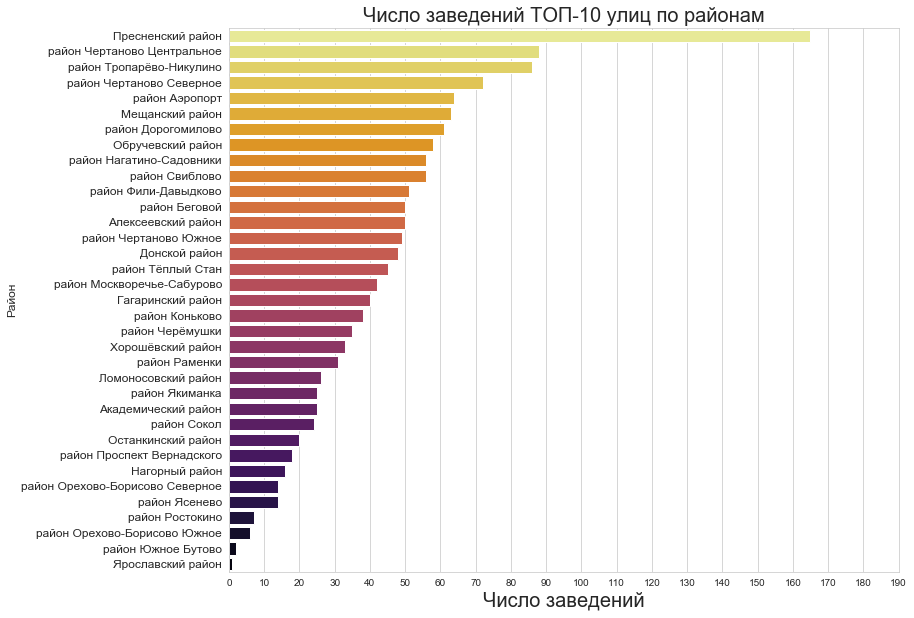

In [28]:
districts = top_locations.pivot_table(index = 'district', values = 'id',
                                        aggfunc = 'sum').sort_values(by='id', ascending=False).reset_index()
districts.columns = ['district', 'cafes']
display(districts.head())
print(len(districts))

plt.figure(figsize=(12,10))
sns.set_style('whitegrid')
sns.barplot(y = districts['district'], x=districts['cafes'], palette='inferno_r')
plt.title("Число заведений ТОП-10 улиц по районам", fontsize=20)
plt.ylabel("Район", fontsize=12)
plt.xlabel("Число заведений", fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=10)
plt.xticks(np.arange(0, 200, 10)) 
plt.show()

ТОП-10 улиц с наибольшим количеством заведений находятся в 37 районах Москвы, на каждый из которых приходится от 1 до 165 заведений. Ключевые точки концентрации заведений общественного питания расположены в следующих районах:
* Пресненский район
* район Чертаново Центральное
* район Тропарёво-Никулино
* район Аэропорт
* Мещанский район

### Улицы с одним объектом общественного питания

In [29]:
boring_streets = streets[streets['count']== 1].reset_index()
print("Число улиц с одним объектом общественного питания:", len(boring_streets))

Число улиц с одним объектом общественного питания: 570


Для определения райнов воспользуемся внешней информацией.

Из-за превышения числа запросов Яндекс.Геокодера пришлось воспользоваться еще одним ресурсом http://hubofdata.ru/storage/f/2013-10-22T09%3A26%3A21.989Z/mosgaz-streets.xls.
По прямой ссылке файл не загружается в тетрадку, поэтому также выложила файл в Google Docs.

In [30]:
spreadsheet_id = "1soa9FsA0fZkmZO0u5XwAQ8mODrhgzijse3fSwF9PSZc"
    
file_name = "https://docs.google.com/spreadsheets/d/{}/export?format=csv".format(spreadsheet_id)
r = requests.get(file_name)
street_dict = pd.read_csv(BytesIO(r.content))

In [31]:
boring_locations = boring_streets.merge(
    street_dict, left_on='street', right_on='street', how='left').drop_duplicates(['street'])

boring_locations = boring_locations.drop(['streetname', 'areaid', 'okrug', 'count'], axis=1)

display(boring_locations.head())
print('Улиц в справочнике:', len(boring_locations))
print('Не удалось установить район:', len(boring_locations[boring_locations['area'].isnull()]))

,street,area
0,улица Инессы Арманд,Район Ясенево
1,4-я Гражданская улица,Район Богородское
2,3-я Северная линия,Район Северный
3,3-я Новоостанкинская улица,Останкинский район
4,3-я Песчаная улица,Хорошевский район


Улиц в справочнике: 570
Не удалось установить район: 23


23 улицы не идентифицированы, что составляет 4% от всех записей, исключим эти наблюдения из анализа и построим график по районам.

,district,empty_streets
0,Таганский район,27
1,Басманный район,26
2,Район Хамовники,22
3,Пресненский район,20
4,Тверской район,20
5,Район Марьина роща,17
6,Район Сокольники,15
7,Район Арбат,14
8,Район Замоскворечье,14
9,Мещанский район,13


Всего районов с 1 заведением на улицу: 102


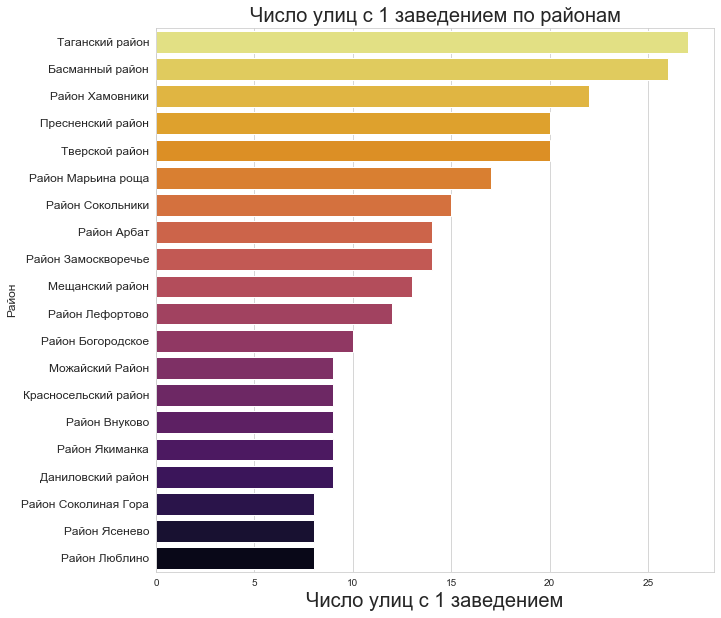

In [32]:
boring_locations = boring_locations.dropna(subset=['area'])

boring_districts = boring_locations.pivot_table(index = 'area', values = 'street',
                                        aggfunc = 'count').sort_values(by='street', ascending=False).reset_index()
boring_districts.columns = ['district', 'empty_streets']
display(boring_districts.head(10))
print('Всего районов с 1 заведением на улицу:',len(boring_districts))

plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.barplot(y = boring_districts.head(20)['district'], x=boring_districts.head(20)['empty_streets'], palette='inferno_r')
plt.title("Число улиц с 1 заведением по районам", fontsize=20)
plt.ylabel("Район", fontsize=12)
plt.xlabel("Число улиц с 1 заведением", fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=10)
plt.xticks(np.arange(0, 30, 5)) 
plt.show()

570 улиц с одним заведением расположены в 102 районах Москвы, при этом данные районы частично пересекаются с локациями, насыщенными заведениями (например, Пресненский район). Сопоставление этих двух списков может выявить песпективные локации.

In [33]:
merge = districts.merge(boring_districts, left_on='district', right_on='district', how='inner')

display(merge)

,district,cafes,empty_streets
0,Пресненский район,165,20
1,Мещанский район,63,13
2,Алексеевский район,50,7
3,Донской район,48,4
4,Останкинский район,20,3
5,Нагорный район,16,4


Найдено 6 районов Москвы, где одновременно есть оживленные улицы и улицы с недостатком мест общественного питания. Можно рассматривать эти локации для открытия ресторана с роботизированным обслуживанием.

### Распределение количества посадочных мест для улиц с большим количеством заведений

count    1474.0
mean       59.0
std        91.0
min         0.0
25%        12.0
50%        40.0
75%        76.0
max      1700.0
Name: number, dtype: float64

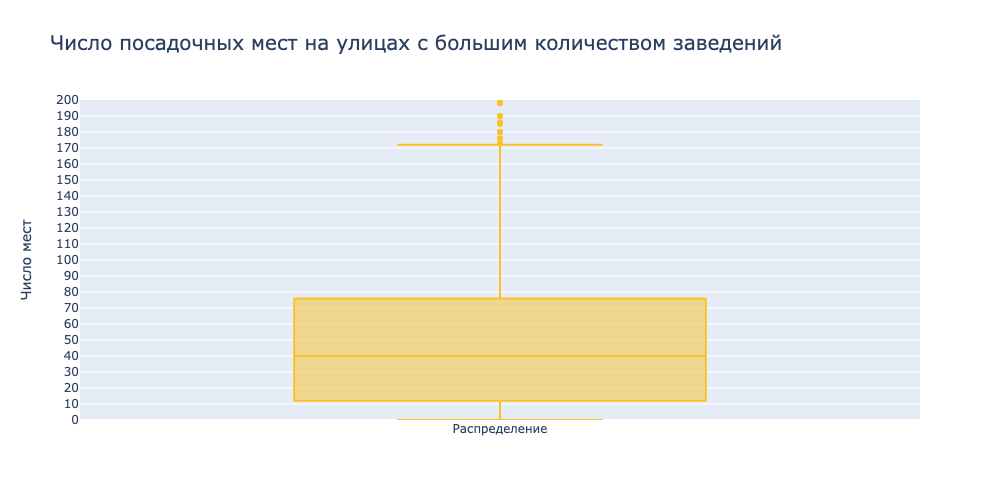

In [34]:
top_data = data.loc[data['street'].isin(top_streets['street'])]

display(top_data['number'].describe().round(0))

fig = go.Figure()
fig.add_trace(go.Box(
    y=top_data["number"],
    name='Распределение',
    marker_color='#fac228'
))
fig.update_layout(title_text='Число посадочных мест на улицах с большим количеством заведений', 
                  yaxis_title='Число мест', title_font_size=20,
                  width=800, height=600)
fig.update_yaxes(range = [0,200], nticks=40)

fig.show(width=1000, height=500, renderer='png')

Для улиц с большим количеством объектов общественного питания характерно небольшое количество посадочных мест - от 12 до 75 в половине случаев, при этом распределение имеет длинный правый хвост и среднее значение в 1,5 раза больше медианы (59 и 40 соответственно).

### Общий вывод

В рамках данного исследования были использованы открытые данные о заведениях общественного питания Москвы, включая такие параметры, как название заведения, принадлеженость к сети, вид, адрес и число посадочных мест. На этапе предобработки в данных были обнаружены неявные дубликаты, в частности, записям с одинаковыми параметрами были присвоены разные id, кроме того, заведения с совпадающими наваниями и адресами были записаны с разным числом посадочных мест. После удаления дубликатов в таблице осталось 15159 записей (из 15366 исходных).

Исследование рынка общественного питания Москвы показало, что:

* Доля кафе среди заведений общественного питания составляет 40%, на 2 и 3 месте находятся столовые и рестораны (17% и 15% соответственно). Наименее распространены кафетерии, закусочные и отделы кулинарии.
* 19% заведений входят в сети, доля сетей среди кафе – 23%. Половина сетей включают от 2 до 9 заведений, при этом отдельные сети могут насчитывать 100 и более заведений (170 максимум). В половине сетей среднее число посадочных мест на одно кафе варьируется от 20 до 80. Размер сети и среднее количество посадочных мест в заведениях не взаимосвязаны.
* Типичная вместительность кафе составляет 15-50 мест, вместительность баров – 20-50, ресторанов – 48-114 мест, Самыми вместительными заведениями общественного питания являются столовые - от 52 до 200 мест в половине случаев. Закусочные, кафетерии и отделы кулинарии зачастую вмещают не более 30 посетителей. 12-75 мест - типичная вместительность заведений на улицах с большим количеством заведений.
* Наболее насыщенными с точки зрения количества заведений общественного питания являются следующие улицы Москвы: проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица.
* ТОП-10 улиц с наибольшим количеством заведений находятся в 37 районах Москвы, на каждый из которых приходится от 1 до 165 заведений. Ключевые точки концентрации заведений общественного питания расположены в следующих районах: Пресненский район, район Чертаново Центральное, район Тропарёво-Никулино, район Аэропорт, Мещанский район.
* 570 улиц с единственным объектом общественного питания расположены в 102 районах Москвы, при этом найдено 6 районов Москвы, где одновременно есть оживленные улицы и улицы с недостатком мест общественного питания. Можно рассматривать эти локации для открытия ресторана с роботизированным обслуживанием: Пресненский район, Мещанский район, Алексеевский район, Донской район, Останкинский район, Нагорный район.

**Рекомендации**
* **Тип заведения.** Предпочтительным форматом заведения с роботизированным обслуживанием является кафе: сегмент рынка наиболее емкий, а оригинальная концепция обеспечит конкурентное преимущество.
* **Район.** Для открытия кафе рекомендуется рассмотреть районы, где находятся улицы как с большим количеством заведений, так с единственным местом общественного питания: Пресненский район, Мещанский район, Алексеевский район, Донской район, Останкинский район, Нагорный район.
* **Количество посадочных мест.** Рекомендуемое количество посадочных мест с учетом формата и района расположения – не более 50.
* **Возможность развития сети.** Учитывая распространенность сетевого формата среди кафе и разнообразия перспективных районов, рекомендуется рассмотреть возможность развития сети в дальнейшем.


Сссылка на презентацию исследования в формате pdf: <https://drive.google.com/file/d/1VnE-XIQ5WJEkORjEIQJwDjkIR9sDQVln/view?usp=sharing> 
